# 🎯 Thompson Sampling

O **Thompson Sampling** é um algoritmo usado em problemas de  **exploration vs. exploitation** como o **Multi-Armed Bandit**. Ele busca equilibrar a exploração de opções menos conhecidas com a exploração das melhores opções já identificadas.  

## 📚 Conceito

O algoritmo é baseado em **probabilidades bayesianas**. Ele mantém uma distribuição de probabilidade para cada ação (ou braço do bandido) e, a cada rodada, **amostra** uma recompensa possível de cada distribuição para decidir qual ação tomar.  

✅ **Exploração**: testa ações incertas para obter mais informações.  
✅ **Exploração**: seleciona ações que provavelmente têm a maior recompensa com base nas informações atuais.  

---

## 🛠️ Passo a Passo

1. Inicialize uma distribuição de probabilidade para cada ação.  
2. Em cada rodada:
   - **Amostre** uma recompensa possível de cada distribuição.  
   - Escolha a ação com a maior amostra.  
   - Observe a recompensa recebida.  
   - Atualize a distribuição da ação escolhida com base no resultado (Bayes).  

---

## 📈 Aplicações

- Otimização de anúncios online (escolha do melhor anúncio para exibir).  
- Testes A/B dinâmicos.  
- Sistemas de recomendação.  

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
  ad = 0
  max_random = 0
  for i in range(0, d):
    random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
    if (random_beta > max_random):
      max_random = random_beta
      ad = i
  ads_selected.append(ad)
  reward = dataset.values[n, ad]
  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
  else:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
  total_reward = total_reward + reward

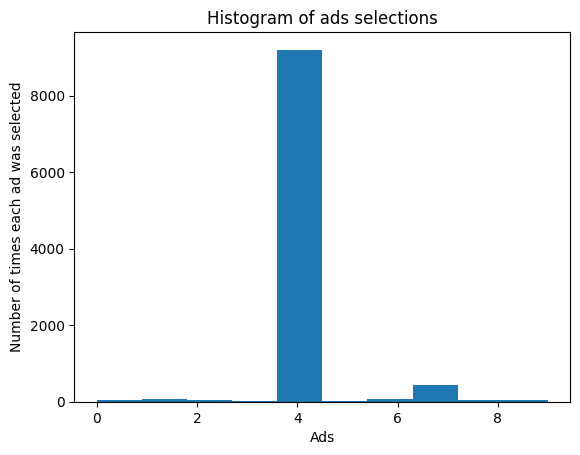

In [4]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()